# Load Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('processed_data.csv')

# Academic Progragrams against different Demographics

## Gender

    GENDER  PROGRAM/MAJOR  Count
0        1             24   1018
1        1             54    982
2        1             40    896
3        1             27    840
4        1             16    805
5        1             52    805
6        1             43    783
7        1             33    766
8        1             57    733
9        1             68    692
10       2             24   1162
11       2             78    953
12       2             16    936
13       2              4    759
14       2             27    692
15       2             79    620
16       2             81    573
17       2             52    543
18       2             26    525
19       2             25    489


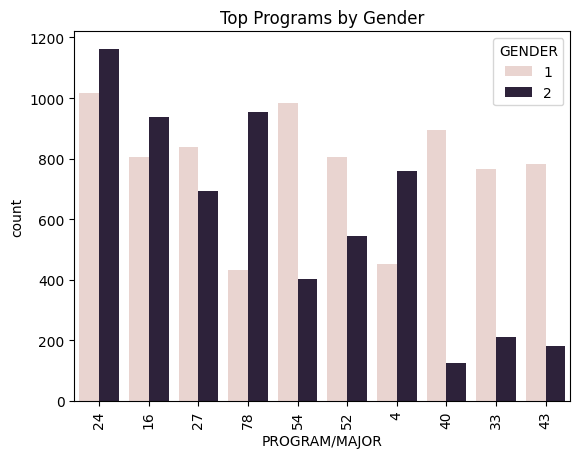

' \nInterpretation:\n\n1. Program 24:\n    - Very popular with both genders.\n    - Slightly more females (Gender 2) enrolled than males (Gender 1).\n\n2. Program 16, 27, 52:\n    - Good number of enrollments in both males (Gender 1) and females (Gender 2).\n\n3. Program 78, 4:\n    - Noticeably more females (Gender 2) enrolled than males (Gender 1).\n\n4. Program 54, 40, 33, 43:\n    - Strong enrollment of males (Gender 1) but very low enrollment of females (Gender 2).\n\n'

In [22]:
# Academic Programs vs Gender

top_programs = df['PROGRAM/MAJOR'].value_counts().head(10).index

gender_program_counts = df.groupby(['GENDER', 'PROGRAM/MAJOR']).size().reset_index(name='Count')
top_gender_programs = gender_program_counts.sort_values(['GENDER', 'Count'], ascending=[True, False]).groupby('GENDER').head(10).reset_index(drop=True)
print(top_gender_programs)

sns.countplot(data=df, x='PROGRAM/MAJOR', hue='GENDER', order=df['PROGRAM/MAJOR'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title("Top Programs by Gender")
plt.show()

''' 
Interpretation:

1. Program 24:
    - Very popular with both genders.
    - Slightly more females (Gender 2) enrolled than males (Gender 1).

2. Program 16, 27, 52:
    - Good number of enrollments in both males (Gender 1) and females (Gender 2).

3. Program 78, 4:
    - Noticeably more females (Gender 2) enrolled than males (Gender 1).

4. Program 54, 40, 33, 43:
    - Strong enrollment of males (Gender 1) but very low enrollment of females (Gender 2).

'''


## Age Range

    AGE RANGE OF ENROLLED STUDENT  PROGRAM/MAJOR  Count
0                               0             16    477
1                               0             40    410
2                               0             24    331
3                               0             78    309
4                               0             43    288
5                               0             52    276
6                               0             67    228
7                               0              4    223
8                               0             33    194
9                               0             41    194
10                              1             16    468
11                              1             78    379
12                              1             24    312
13                              1             43    292
14                              1              4    281
15                              1             40    253
16                              1             52

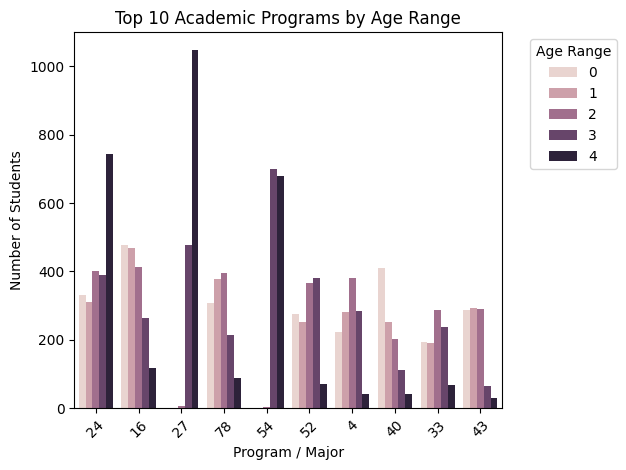

'\nInterpretation:\n\nNote:\n    0:<=18\n    1:19-20\n    2:21-23\n    3:24-29\n    4:<=30\n\n1. Program 24:\n    - Attracts students from all age ranges.\n    - Particularly popular among students aged <=30.\n\n2. Program 16:\n    - Popularity keeps decreasing with age.\n\n3. Program 27, 54:\n    - Attracts students aged 24-29 and especially >=30.\n    - Not at all popular among younger students.\n\n4. Program 4, 40, 43:\n    - Not at all popular among older students aged >=30.\n\n5. Program 78, 52, 33:\n    - Fairly popular among students aged upto 24.\n\n'

In [23]:
# Academic Programs vs Age Range

gender_program_counts = df.groupby(['AGE RANGE OF ENROLLED STUDENT', 'PROGRAM/MAJOR']).size().reset_index(name='Count')
top_age_programs = gender_program_counts.sort_values(['AGE RANGE OF ENROLLED STUDENT', 'Count'], ascending=[True, False]).groupby('AGE RANGE OF ENROLLED STUDENT').head(10).reset_index(drop=True)
print(top_age_programs)
filtered_data = df[df['PROGRAM/MAJOR'].isin(top_programs)]


sns.countplot(data=filtered_data,
              x='PROGRAM/MAJOR',
              hue='AGE RANGE OF ENROLLED STUDENT',
              order=top_programs)

plt.title("Top 10 Academic Programs by Age Range")
plt.xlabel("Program / Major")
plt.ylabel("Number of Students")
plt.legend(title="Age Range", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

'''
Interpretation:

Note:
    0:<=18
    1:19-20
    2:21-23
    3:24-29
    4:<=30
    
1. Program 24:
    - Attracts students from all age ranges.
    - Particularly popular among students aged <=30.

2. Program 16:
    - Popularity keeps decreasing with age.

3. Program 27, 54:
    - Attracts students aged 24-29 and especially >=30.
    - Not at all popular among younger students.

4. Program 4, 40, 43:
    - Not at all popular among older students aged >=30.
    
5. Program 78, 52, 33:
    - Fairly popular among students aged upto 24.
    
'''

## Study Mode

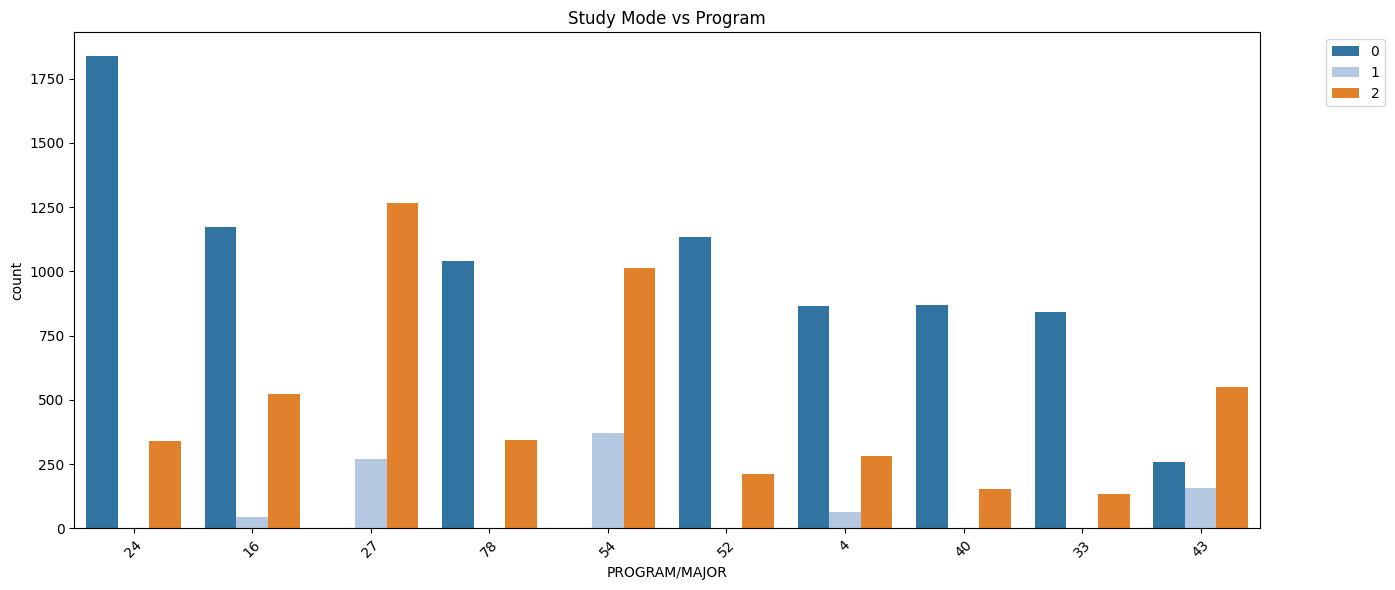

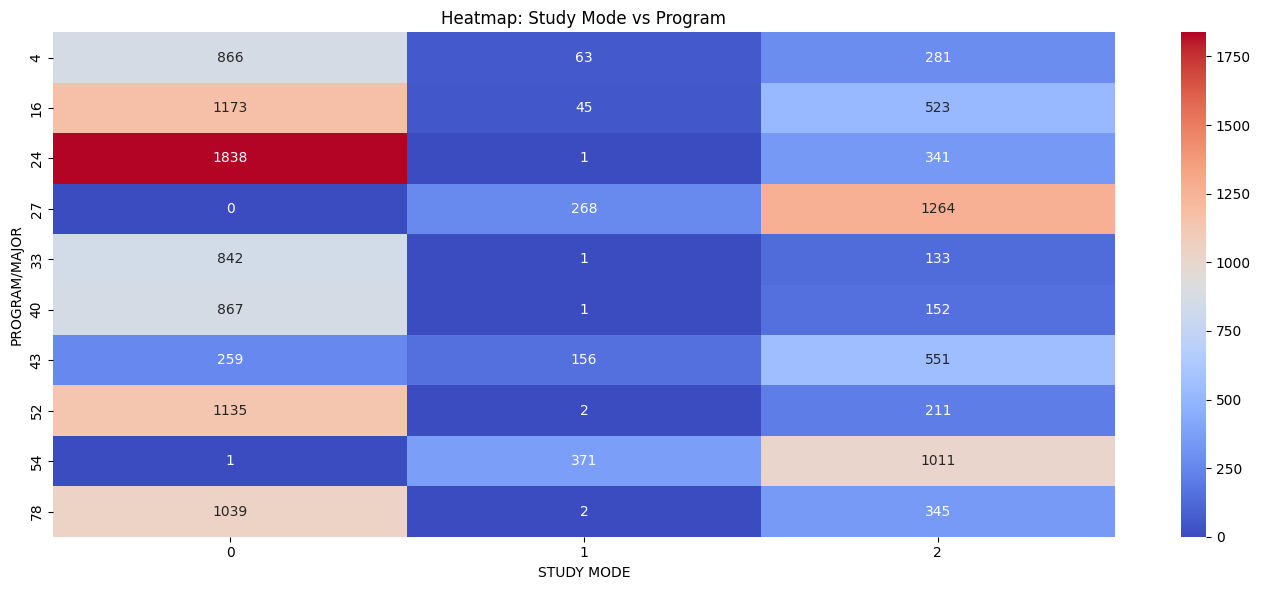

'\n\nInterpretation:\n\nNote:\n    0:Presencial\n    1:Virtual\n    2:Remote\n\n1. Program 24:\n    - Most popular program with presencial students.\n    - Least popular with virtual students.\n\n2. Program 27, 54:\n    - Least popular program with presencial students.\n    - Most popular with remote students.\n\n3. Program 78, 52, 40, 33:\n    - Fairly popular with presencial students.\n    - Not at all popular with virtual students.\n\nOverall:\n    - Presencial is the most popular study mode and Virtual is the least popular study mode.\n    - Programs which are popular with presencial have very low participation from virtual.\n    - Program 24 is the most popular program with presencial students.\n    - Program 54 is the most popular program with virtual students.\n    - Program 27 is the most popular program with remote students.\n\n'

In [24]:
# Academic Programs vs Study Mode

# Countplot
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='PROGRAM/MAJOR', hue='STUDY MODE', palette='tab20', order=top_programs)
plt.title('Study Mode vs Program')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Heatmap
heatmap_data = pd.crosstab(filtered_data['PROGRAM/MAJOR'], filtered_data['STUDY MODE'])
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')
plt.title("Heatmap: Study Mode vs Program")
plt.tight_layout()
plt.show()

'''

Interpretation:

Note:
    0:Presencial
    1:Virtual
    2:Remote
    
1. Program 24:
    - Most popular program with presencial students.
    - Least popular with virtual students.

2. Program 27, 54:
    - Least popular program with presencial students.
    - Most popular with remote students.

3. Program 78, 52, 40, 33:
    - Fairly popular with presencial students.
    - Not at all popular with virtual students.

Overall:
    - Presencial is the most popular study mode and Virtual is the least popular study mode.
    - Programs which are popular with presencial have very low participation from virtual.
    - Program 24 is the most popular program with presencial students.
    - Program 54 is the most popular program with virtual students.
    - Program 27 is the most popular program with remote students.
    
'''


## Shift/Schedule vs Program Major

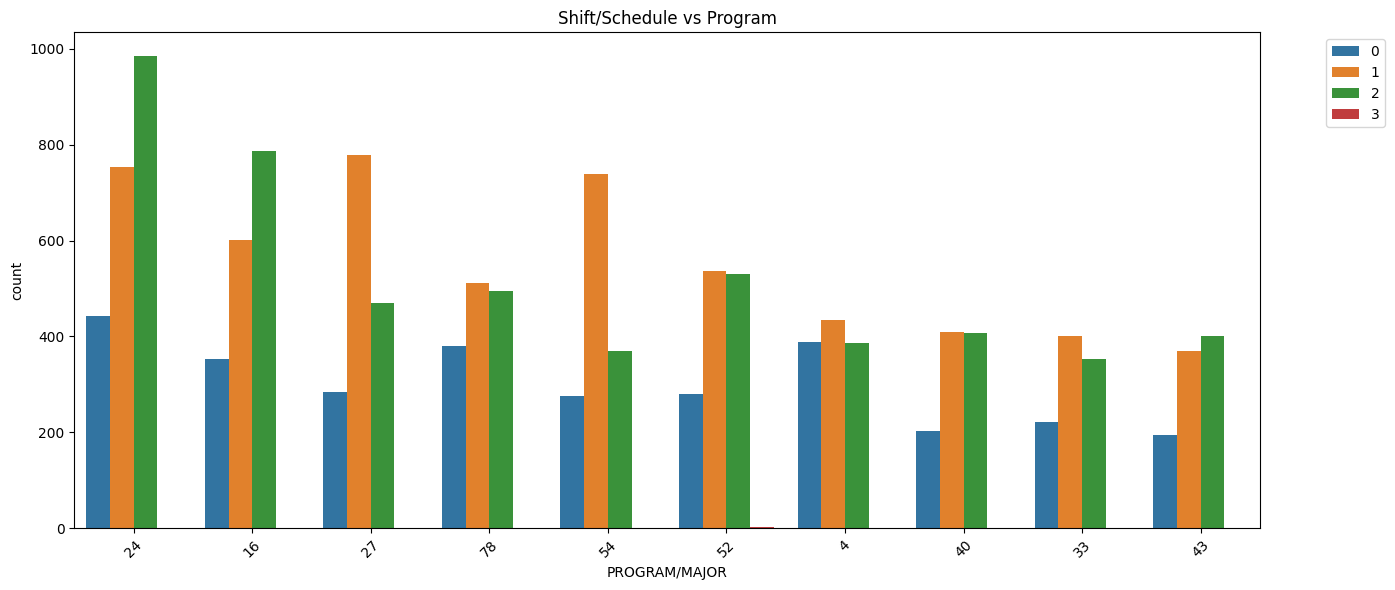

'\n\nInterpretation:\n\nNote:\n    0:Mixto\n    1:Noche\n    2:Manana\n    3:Tarde\n\n1. Program 24:\n    - Popular across all shifts/schedules.\n    - Most popular program in the "Mixto" shift.\n\n2. Program 27, 54:\n    - Most popular programs in the "Noche" shifts.\n\n3. Program 78, 4:\n    - Almost equally popular in "Mixto", "Noche" and "Manana" shifts.\n\nOverall:\n    - "Noche" shift has the highest enrollment across most programs.\n    - "Tarde" shift has the least enrollment in general by a huge margin.\n\n'

In [25]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='PROGRAM/MAJOR', hue='SHIFT/SCHEDULE', palette='tab10', order=top_programs)
plt.title('Shift/Schedule vs Program')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

'''

Interpretation:

Note:
    0:Mixto
    1:Noche
    2:Manana
    3:Tarde

1. Program 24:
    - Popular across all shifts/schedules.
    - Most popular program in the "Mixto" shift.

2. Program 27, 54:
    - Most popular programs in the "Noche" shifts.

3. Program 78, 4:
    - Almost equally popular in "Mixto", "Noche" and "Manana" shifts.

Overall:
    - "Noche" shift has the highest enrollment across most programs.
    - "Tarde" shift has the least enrollment in general by a huge margin.
    
'''


## Program/Major vs Benefit Discounts

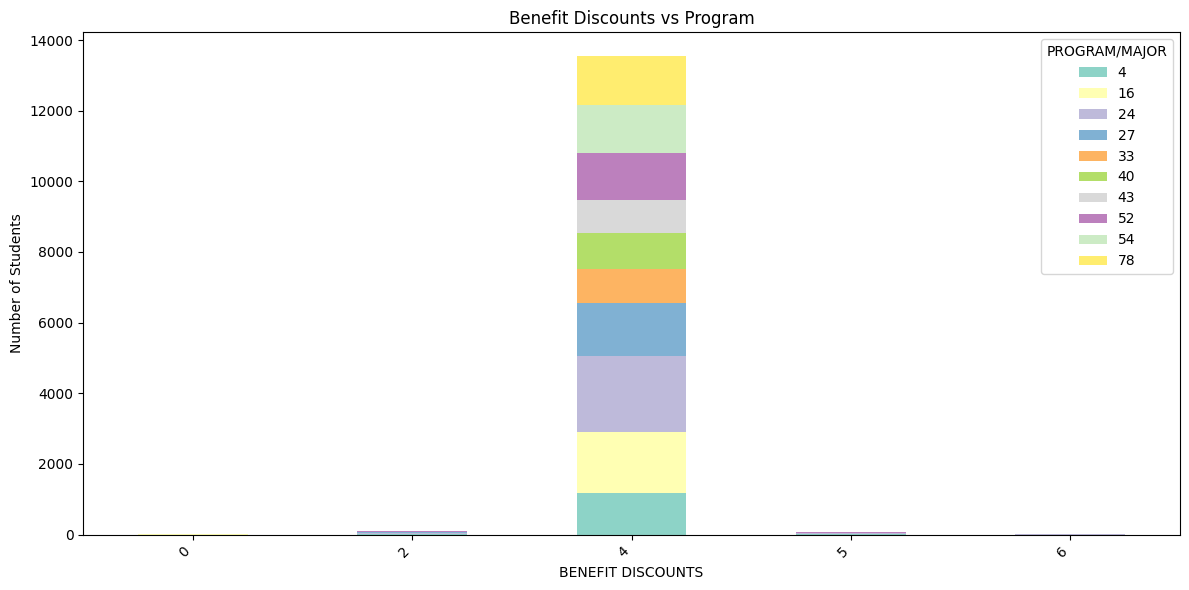

'\n\nInterpretation:\n\n1. Program 24:\n    - The most popular program across all benefit discount categories.\n    - Indicates that this program is accessible and attracts students with varying levels of financial support.\n\n2. Program 27 and 54:\n    - Show significant participation from students availing benefit discounts.\n    - Suggests these programs are particularly appealing to students seeking financial aid.\n\n3. Program 78 and 52:\n    - Moderate participation from students with benefit discounts.\n    - Indicates a balanced mix of students with and without financial support.\n\n4. Program 40 and 33:\n    - Lower participation from students with benefit discounts compared to other programs.\n    - May indicate these programs are less reliant on financial aid for enrollment.\n\nOverall:\n    - Programs with higher participation from students availing benefit discounts are likely more affordable or offer better financial aid options.\n    - Programs like 24 and 27 demonstrate

In [26]:
benefit_program = pd.crosstab(filtered_data['BENEFIT DISCOUNTS'], filtered_data['PROGRAM/MAJOR'])
benefit_program.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title("Benefit Discounts vs Program")
plt.ylabel("Number of Students")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

'''

Interpretation:

1. Program 24:
    - The most popular program across all benefit discount categories.
    - Indicates that this program is accessible and attracts students with varying levels of financial support.

2. Program 27 and 54:
    - Show significant participation from students availing benefit discounts.
    - Suggests these programs are particularly appealing to students seeking financial aid.

3. Program 78 and 52:
    - Moderate participation from students with benefit discounts.
    - Indicates a balanced mix of students with and without financial support.

4. Program 40 and 33:
    - Lower participation from students with benefit discounts compared to other programs.
    - May indicate these programs are less reliant on financial aid for enrollment.

Overall:
    - Programs with higher participation from students availing benefit discounts are likely more affordable or offer better financial aid options.
    - Programs like 24 and 27 demonstrate inclusivity and accessibility for students from diverse financial backgrounds.
   
'''

## Deparment vs Program/Major

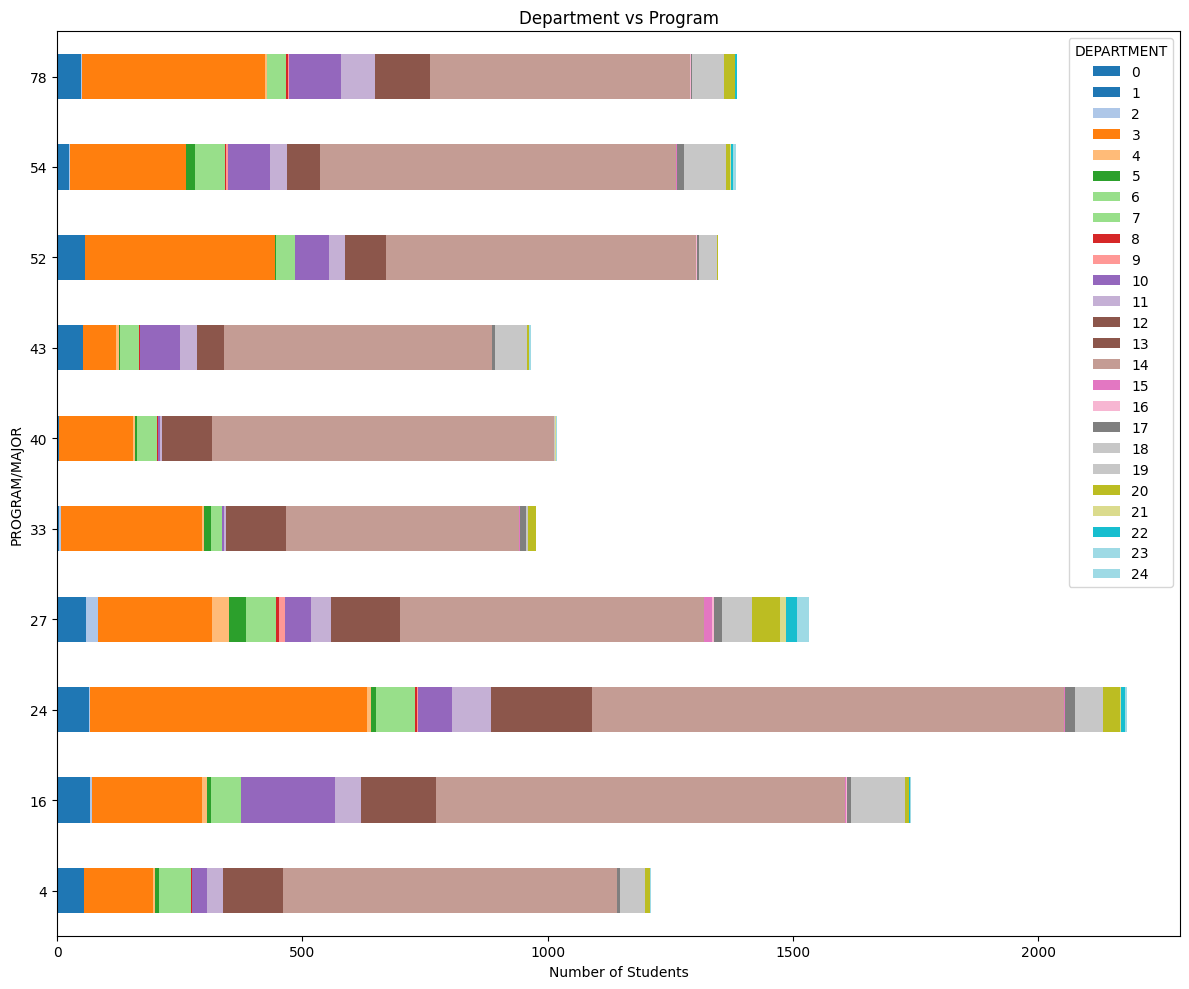

'\n\nInterpretation:\n\n1. Program 24:\n    - Strong representation across multiple departments.\n    - Indicates that this program is widely offered and popular across various departments.\n\n4. Program 43, 40, 33:\n    - Limited representation in fewer departments.\n    - Suggests these programs are niche and offered in select departments.\n\nOverall:\n    - Deapartment 14 has the highest number of programs.\n    - Department 16 has the lowest number of programs.\n    - The distribution of programs across departments reflects the diversity and specialization of academic offerings.\n\n'

In [27]:
dept_prog = pd.crosstab(filtered_data['PROGRAM/MAJOR'], filtered_data['DEPARTMENT'])
dept_prog.plot(kind='barh', stacked=True, figsize=(12, 10), colormap='tab20')
plt.title("Department vs Program")
plt.xlabel("Number of Students")
plt.tight_layout()
plt.show()

'''

Interpretation:

1. Program 24:
    - Strong representation across multiple departments.
    - Indicates that this program is widely offered and popular across various departments.

4. Program 43, 40, 33:
    - Limited representation in fewer departments.
    - Suggests these programs are niche and offered in select departments.

Overall:
    - Deapartment 14 has the highest number of programs.
    - Department 16 has the lowest number of programs.
    - The distribution of programs across departments reflects the diversity and specialization of academic offerings.
   
'''

## Enrollment vs Program/Major

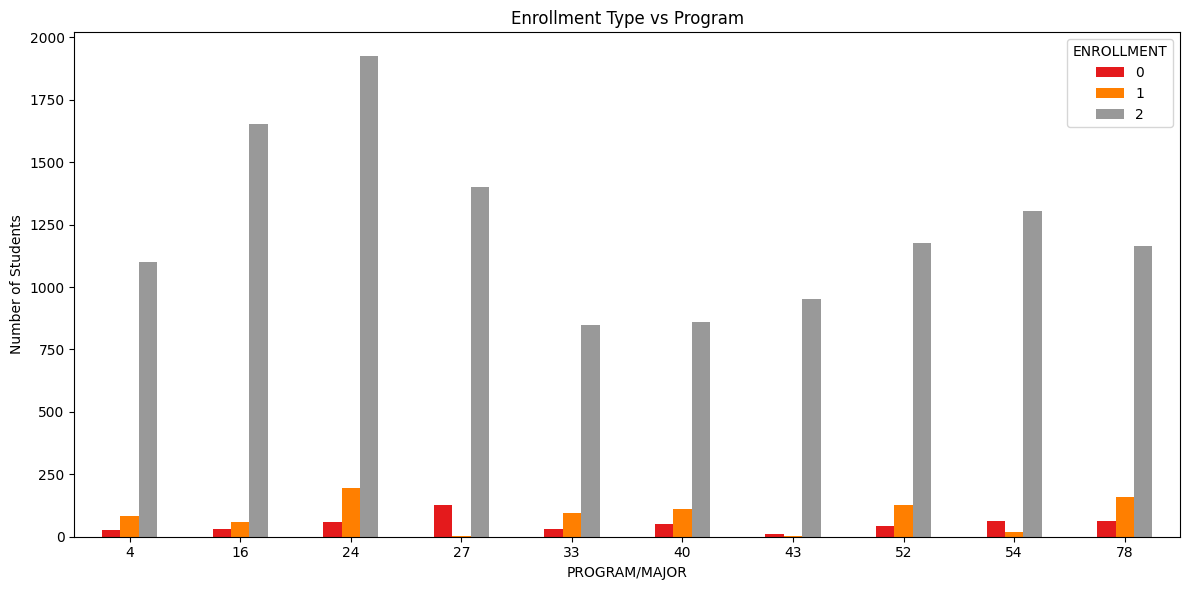

'\n\nInterpretation:\n\n1. Program 24:\n    - The most popular program across all enrollment types.\n    - Indicates that this program is widely accessible and attracts a diverse range of students.\n\n2. Program 43:\n    - Least popular program across all enrollment types.\n    - Suggests that this program may have specific admission criteria or limited appeal.\n\n5. Overall Trends:\n    - The "Regular" enrollment type has the highest number of students across most programs.\n    - The "Special" enrollment type has the lowest number of students across all programs.\n    - The distribution reflects the diversity of academic offerings and student preferences.\n\n'

In [28]:
enrollment_program = pd.crosstab(filtered_data['PROGRAM/MAJOR'], filtered_data['ENROLLMENT'])
enrollment_program.plot(kind='bar', figsize=(12, 6), colormap='Set1')
plt.title("Enrollment Type vs Program")
plt.ylabel("Number of Students")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


'''

Interpretation:

1. Program 24:
    - The most popular program across all enrollment types.
    - Indicates that this program is widely accessible and attracts a diverse range of students.

2. Program 43:
    - Least popular program across all enrollment types.
    - Suggests that this program may have specific admission criteria or limited appeal.

5. Overall Trends:
    - The "Regular" enrollment type has the highest number of students across most programs.
    - The "Special" enrollment type has the lowest number of students across all programs.
    - The distribution reflects the diversity of academic offerings and student preferences.
   
'''

# Enrolled Courses vs At risk

C:\Users\prach\AppData\Local\Temp\ipykernel_24300\2327530165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


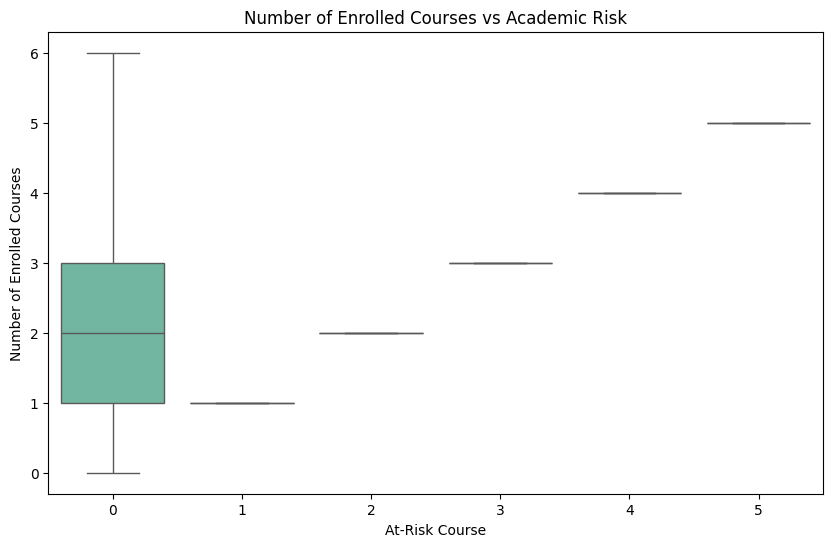

C:\Users\prach\AppData\Local\Temp\ipykernel_24300\2327530165.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df,


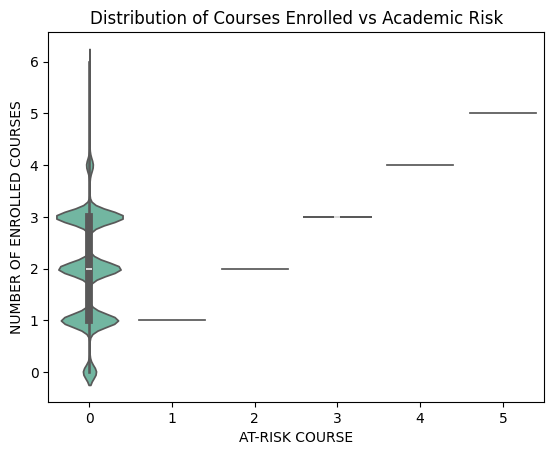

'\nGives similar information as the box plot but also shows the density/distribution of enrolled courses:\n\nFor risk level 0, there are multiple peaks at 1, 2, and 3 courses.\n\nSuggests several common course loads among students not at risk.\n\nFor risk levels 1–5, the density collapses into a single point at each risk level (e.g., risk level 3 = 3 enrolled courses).\n\nAgain, implies no variation in course loads for higher-risk students, which might be due to:\n\nData preprocessing (e.g., risk level might be equal to number of courses).\n\nAn actual policy (e.g., assigning risk based on the number of courses).\n'

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df,
            x='AT-RISK COURSE',
            y='NUMBER OF ENROLLED COURSES',
            palette='Set2')

plt.title("Number of Enrolled Courses vs Academic Risk")
plt.xlabel("At-Risk Course")
plt.ylabel("Number of Enrolled Courses")
plt.show()


sns.violinplot(data=df,
               x='AT-RISK COURSE',
                y='NUMBER OF ENROLLED COURSES',
               palette='Set2')
plt.title("Distribution of Courses Enrolled vs Academic Risk")
plt.show()

'''
Academic risk level 0 (not at risk):

Wide variation in the number of enrolled courses (ranging from 0 to 6).

Median is around 2 courses.

Indicates high diversity in course load among students not at risk.

Academic risk levels 1 to 5:

As risk increases, the number of enrolled courses becomes more consistent and increases linearly (1 to 5 courses).

No variation at each risk level—students with higher risk seem to be taking exactly as many courses as their risk level.

Suggests a potential direct mapping between number of courses and risk level from 1 to 5 (e.g., 3 enrolled courses → 3 at-risk courses).
'''

'''
Gives similar information as the box plot but also shows the density/distribution of enrolled courses:

For risk level 0, there are multiple peaks at 1, 2, and 3 courses.

Suggests several common course loads among students not at risk.

For risk levels 1–5, the density collapses into a single point at each risk level (e.g., risk level 3 = 3 enrolled courses).

Again, implies no variation in course loads for higher-risk students, which might be due to:

Data preprocessing (e.g., risk level might be equal to number of courses).

An actual policy (e.g., assigning risk based on the number of courses).
'''

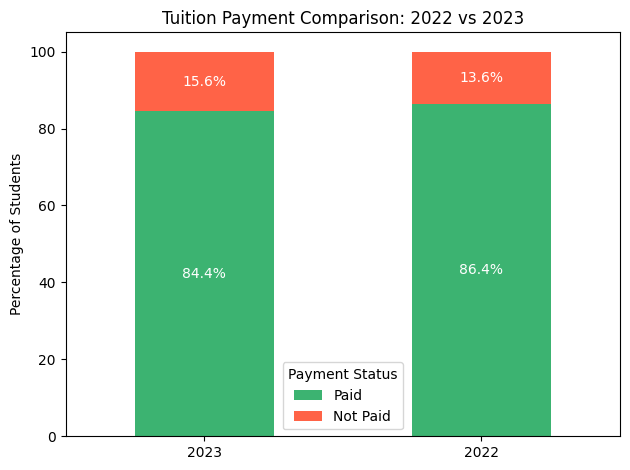

"\n\nInterpretation:\n    - Negetive trend in tuition payment behavior from 2022 to 2023.\n    - Indicates that the institution's efforts to improve financial literacy or support may not have been effective.\n    - The increase in the percentage of students not paying their tuition could be due to various factors, including economic conditions, changes in student demographics, or institutional policies.\n"

In [30]:
payment_counts = pd.DataFrame({
    '2023': filtered_data['TUITION PAYMENT MARCH 2023'].value_counts(normalize=True) * 100,
    '2022': filtered_data['TUITION PAYMENT MARCH 2022'].value_counts(normalize=True) * 100
}).T
payment_counts.columns = [ 'Paid','Not Paid']

ax = payment_counts.plot(kind='bar', stacked=True, color=['mediumseagreen', 'tomato'])

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='white')

plt.title('Tuition Payment Comparison: 2022 vs 2023')
plt.ylabel('Percentage of Students')
plt.xticks(rotation=0)
plt.legend(title='Payment Status')
plt.tight_layout()
plt.show()

'''

Interpretation:
    - Negetive trend in tuition payment behavior from 2022 to 2023.
    - Indicates that the institution's efforts to improve financial literacy or support may not have been effective.
    - The increase in the percentage of students not paying their tuition could be due to various factors, including economic conditions, changes in student demographics, or institutional policies.
'''

C:\Users\prach\AppData\Local\Temp\ipykernel_24300\418517711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['payment_change'] = filtered_data['TUITION PAYMENT MARCH 2023'] - filtered_data['TUITION PAYMENT MARCH 2022']


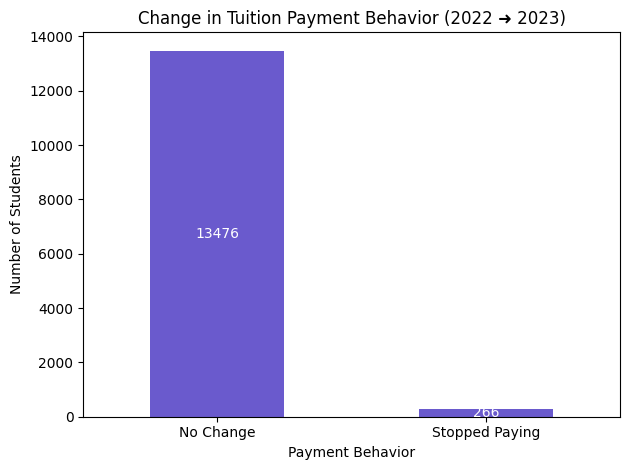

'\n\nInterpretation:\n    - The majority of students maintained their payment status, suggesting a stable financial situation for most students.\n    - A small number of students stopped paying their tuition fees, indicating a potential concern for retention and financial stability.\n\n'

In [31]:
filtered_data['payment_change'] = filtered_data['TUITION PAYMENT MARCH 2023'] - filtered_data['TUITION PAYMENT MARCH 2022']

# Count types of changes
payment_behavior = filtered_data['payment_change'].value_counts().rename({
    -1: 'Stopped Paying',
     0: 'No Change',
     1: 'Started Paying'
})

ax1 = payment_behavior.plot(kind='bar', color='slateblue')

for container in ax1.containers:
    ax1.bar_label(container, label_type='center', fontsize=10, color='white')
    
plt.title('Change in Tuition Payment Behavior (2022 ➜ 2023)')
plt.xlabel('Payment Behavior')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

'''

Interpretation:
    - The majority of students maintained their payment status, suggesting a stable financial situation for most students.
    - A small number of students stopped paying their tuition fees, indicating a potential concern for retention and financial stability.
    
'''

C:\Users\prach\AppData\Local\Temp\ipykernel_24300\317838299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['GENDER'] = filtered_data['GENDER'].map({1: 'Male', 2: 'Female'})


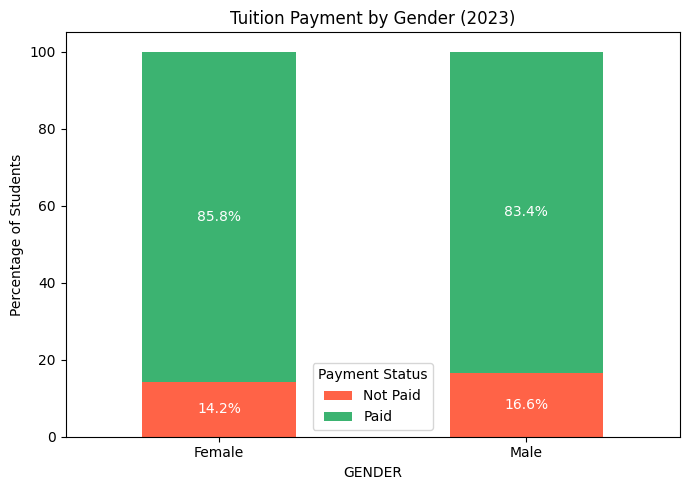

'\n\nInterpretation:\n    - Female students have a slightly higher percentage of tuition payment compared to male students.\n    - The difference in payment behavior between genders is minimal, indicating similar financial commitment across genders.\n\n'

In [32]:
# Map gender values: 1 -> Male, 2 -> Female
filtered_data['GENDER'] = filtered_data['GENDER'].map({1: 'Male', 2: 'Female'})

# Create crosstab for gender and tuition payment status
gender_payment = pd.crosstab(filtered_data['GENDER'], filtered_data['TUITION PAYMENT MARCH 2023'], normalize='index') * 100
gender_payment.columns = ['Not Paid', 'Paid']

# Bar plot
ax2 = gender_payment.plot(kind='bar', stacked=True, color=['tomato', 'mediumseagreen'], figsize=(7,5))
plt.title('Tuition Payment by Gender (2023)')
plt.ylabel('Percentage of Students')
plt.xticks(rotation=0)

# Add % labels on stacked bars
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.1f%%', label_type='center', color='white')

plt.legend(title='Payment Status')
plt.tight_layout()
plt.show()


'''

Interpretation:
    - Female students have a slightly higher percentage of tuition payment compared to male students.
    - The difference in payment behavior between genders is minimal, indicating similar financial commitment across genders.
    
'''

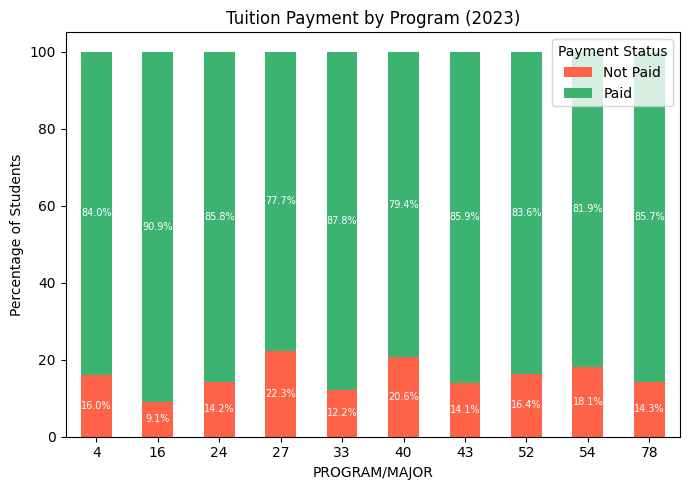

'\n\nInterpretation:\n    - Program 24 has the highest percentage of students who paid their tuition fees, indicating strong financial commitment.\n    - Programs 4 and 43 have the lowest percentage of students who paid, suggesting potential financial challenges or disengagement.\n    - The overall trend indicates that most programs have a higher percentage of students who paid their tuition fees compared to those who did not.\n\n'

In [33]:
program_payment = pd.crosstab(filtered_data['PROGRAM/MAJOR'], filtered_data['TUITION PAYMENT MARCH 2023'], normalize='index') * 100
program_payment.columns = ['Not Paid', 'Paid']

# Bar plot
ax3 = program_payment.plot(kind='bar', stacked=True, color=['tomato', 'mediumseagreen'], figsize=(7,5))
plt.title('Tuition Payment by Program (2023)')
plt.ylabel('Percentage of Students')
plt.xticks(rotation=0)

# Add % labels on stacked bars
for container in ax3.containers:
    ax3.bar_label(container, fmt='%.1f%%', label_type='center', color='white', fontsize=7)

plt.legend(title='Payment Status')
plt.tight_layout()
plt.show()

'''

Interpretation:
    - Program 24 has the highest percentage of students who paid their tuition fees, indicating strong financial commitment.
    - Programs 4 and 43 have the lowest percentage of students who paid, suggesting potential financial challenges or disengagement.
    - The overall trend indicates that most programs have a higher percentage of students who paid their tuition fees compared to those who did not.
    
'''